In [99]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Model

In [100]:
depression_dataset = '/content/sample_data/new_depression_dataset.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(depression_dataset)

print(data)

      Q3  Q5  Q10  Q13  Q16  Q17  Q21  Q24  Q26  Q31  Q34  Q37  Q38  Q42  \
0      1   3    0    3    3    2    0    3    3    3    2    0    1    3   
1      1   3    1    3    2    3    1    1    2    1    1    3    1    1   
2      3   3    3    3    3    3    3    3    0    3    3    3    3    3   
3      1   2    2    0    1    2    0    0    1    2    3    1    0    1   
4      2   3    2    3    2    3    2    1    3    2    3    2    2    2   
...   ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6704   2   2    3    3    2    3    1    1    2    1    3    3    2    2   
6705   2   3    1    2    3    3    3    1    1    1    3    2    3    3   
6706   2   1    3    3    2    3    3    1    1    0    2    3    3    2   
6707   1   3    2    3    2    2    3    1    3    1    2    2    2    3   
6708   1   1    1    2    2    3    2    2    0    1    2    2    1    0   

      Label  
0         3  
1         3  
2         4  
3         2  
4         4  
...

In [101]:
#menampilkan baris-baris awal dari sebuah DataFrame
data.head()

,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Q24,Q26,Q31,Q34,Q37,Q38,Q42,Label
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,3
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,4
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,2
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,4


In [102]:
#membaca dan memanipulasi data dalam bentuk DataFrame
print('Shape of DataFrame: {}'.format(data.shape))
print(data.loc[0])

Shape of DataFrame: (6709, 15)
Q3       1
Q5       3
Q10      0
Q13      3
Q16      3
Q17      2
Q21      0
Q24      3
Q26      3
Q31      3
Q34      2
Q37      0
Q38      1
Q42      3
Label    3
Name: 0, dtype: int64


In [103]:
#Menampilkan sepuluh baris pertama dari DataFrame df
data.loc[:10]

,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Q24,Q26,Q31,Q34,Q37,Q38,Q42,Label
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,3
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,4
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,2
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,4
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,1
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,4
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,4
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4


In [104]:
#Menampilkan statistik deskriptif dari DataFrame df
data.describe()

,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Q24,Q26,Q31,Q34,Q37,Q38,Q42,Label
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,1.244895,1.595320,1.483828,1.811596,1.531078,1.633030,1.365777,1.449843,1.678641,1.397675,1.622149,1.380385,1.404531,1.760322,2.302281
std,1.044667,1.083451,1.153505,1.065943,1.124136,1.162583,1.180894,1.063038,1.066872,1.054635,1.165440,1.153102,1.199415,1.042665,1.544846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000


In [105]:
data.loc[:10]

,Q3,Q5,Q10,Q13,Q16,Q17,Q21,Q24,Q26,Q31,Q34,Q37,Q38,Q42,Label
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,3
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,4
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,2
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,4
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,1
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,4
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,4
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4


In [106]:
x = data.drop(columns=["Label"])
y = data["Label"]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
print(x_train.dtypes)
print(y_train.dtypes)

Q3     int64
Q5     int64
Q10    int64
Q13    int64
Q16    int64
Q17    int64
Q21    int64
Q24    int64
Q26    int64
Q31    int64
Q34    int64
Q37    int64
Q38    int64
Q42    int64
dtype: object
int64


In [109]:
print('X_train shape : ',  x_train.shape)
print('y_train shape : ',  y_train.shape)
print('X_test shape : ',  x_test.shape)
print('y_test shape : ',  y_test.shape)

X_train shape :  (5367, 14)
y_train shape :  (5367,)
X_test shape :  (1342, 14)
y_test shape :  (1342,)


In [110]:
y_train.head()

6547    0
6032    1
6670    1
6212    4
3871    4
Name: Label, dtype: int64

In [111]:
model = keras.models.Sequential([
    # Input layer memiliki 15 unit yang sesuai dengan jumlah fitur (ada 15 pertanyaan)
    keras.layers.Dense(units=64, input_shape=(14,)),
    # Hidden layer memiliki 10 unit dengan fungsi aktivasi relu
    keras.layers.Dense(units=10, activation='relu'),
    # Output layer memiliki 5 unit dengan fungsi aktivasi softmax, yang sesuai dengan jumlah kelas
    keras.layers.Dense(units=5, activation='softmax')
])

In [112]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                960       
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
 dense_26 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
print(x_train.shape)

(5367, 14)


Fungsi Model

In [115]:
def x_y (data):
  x = data.drop(columns=["Label"])
  y = data["Label"]
  return x, y

In [116]:
def split_data(X, Y, test_size, random_state):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
  return x_train, x_test, y_train, y_test

In [117]:
def create_model():
  model = keras.models.Sequential([
    # Input layer memiliki 15 unit yang sesuai dengan jumlah fitur (ada 15 pertanyaan)
    keras.layers.Dense(units=64, input_shape=(14,)),
    # Hidden layer memiliki 10 unit dengan fungsi aktivasi relu
    keras.layers.Dense(units=10, activation='relu'),
    # Output layer memiliki 5 unit dengan fungsi aktivasi softmax, yang sesuai dengan jumlah kelas
    keras.layers.Dense(units=5, activation='softmax')
  ])
  # compile model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # show model summary
  model.summary()

  return model

In [118]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history[f'val_{metric}'])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, f'val_{metric}'])
  plt.show()

In [119]:
def evaluate_model(x_test, y_test):
  evaluation = model.evaluate(x_test, y_test)
  print("Evaluation Loss:", evaluation[0])
  print("Evaluation Accuracy:", evaluation[1])

Depression

In [122]:
x_train, x_test, y_train, y_test = split_data(x, y, 0.2, 42)

In [123]:
model = create_model()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                960       
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
 dense_32 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
168/168 [==============================] - 1s 3ms/step - loss: 1.2767 - accuracy: 0.4561 - val_loss: 1.0818 - val_accuracy: 0.5797
Epoch 2/10
168/168 [==============================] - 0s 2ms/step - loss: 0.9347 - accuracy: 0.6234 - val_loss: 0.7813 - val_accuracy: 0.6833
E

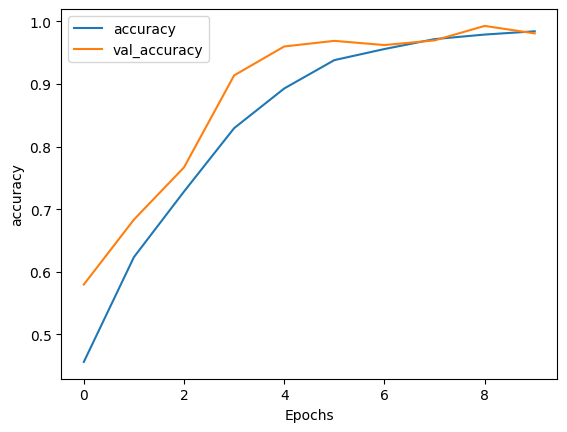

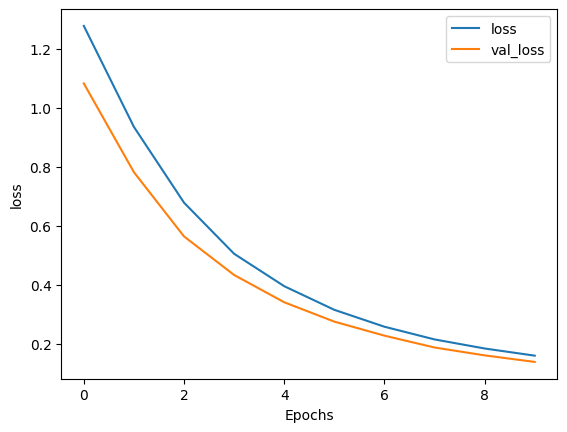

In [124]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [125]:
evaluate_model(x_test, y_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9806
Evaluation Loss: 0.13862797617912292
Evaluation Accuracy: 0.9806259274482727


-------------------

Anxiety

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                960       
                                                                 
 dense_34 (Dense)            (None, 10)                650       
                                                                 
 dense_35 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
995/995 [==============================] - 4s 3ms/step - loss: 0.6235 - accuracy: 0.7758 - val_loss: 0.2169 - val_accuracy: 0.9761
Epoch 2/10
995/995 [==============================] - 2s 2ms/step - loss: 0.1408 - accuracy: 0.9825 - val_loss: 0.0954 - val_accuracy: 0.9781
E

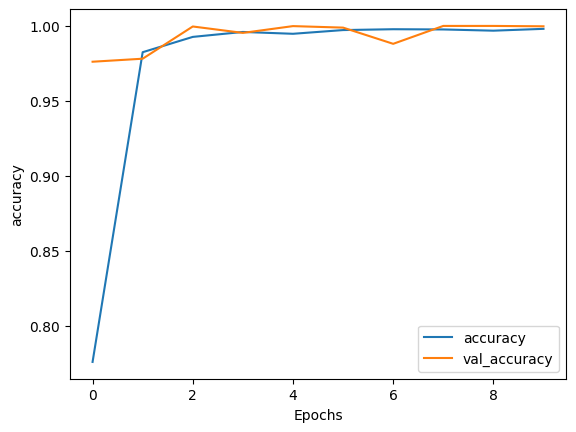

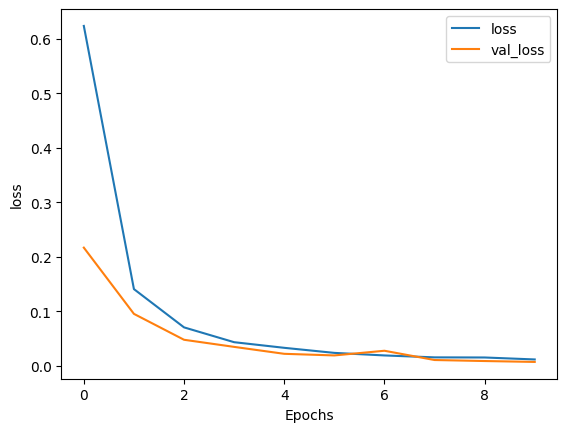

In [126]:
data = pd.read_csv('/content/sample_data/anxiety_dataset.csv')
x, y = x_y(data)
x_train, x_test, y_train, y_test = split_data(x, y, 0.2, 42)
model = create_model()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [127]:
evaluate_model(x_test, y_test)

249/249 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9997
Evaluation Loss: 0.007294419687241316
Evaluation Accuracy: 0.9997485876083374


Stress

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                960       
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
 dense_38 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
995/995 [==============================] - 7s 5ms/step - loss: 0.7905 - accuracy: 0.7219 - val_loss: 0.2738 - val_accuracy: 0.9514
Epoch 2/10
995/995 [==============================] - 5s 5ms/step - loss: 0.1905 - accuracy: 0.9634 - val_loss: 0.1844 - val_accuracy: 0.9077
E

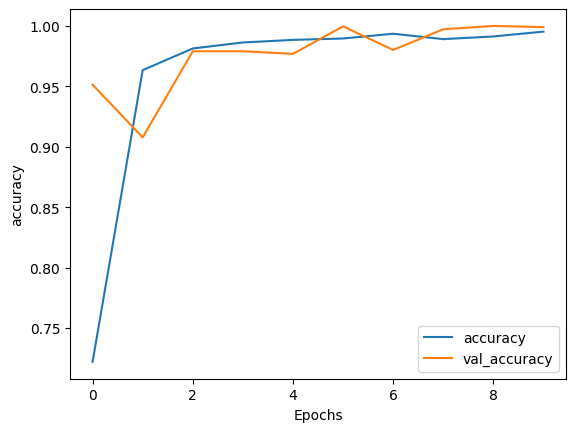

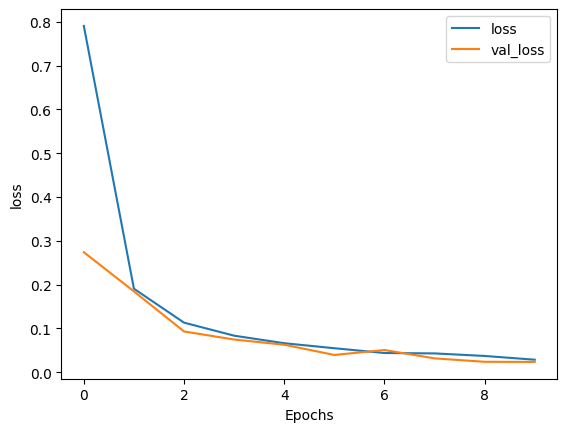

In [128]:
data = pd.read_csv('/content/sample_data/stress_dataset.csv')
x, y = x_y(data)
x_train, x_test, y_train, y_test = split_data(x, y, 0.2, 42)
model = create_model()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [129]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
995/995 [==============================] - 3s 3ms/step - loss: 0.0340 - accuracy: 0.9912 - val_loss: 0.0542 - val_accuracy: 0.9780
Epoch 2/10
995/995 [==============================] - 2s 2ms/step - loss: 0.0260 - accuracy: 0.9942 - val_loss: 0.0254 - val_accuracy: 0.9961
Epoch 3/10
995/995 [==============================] - 3s 3ms/step - loss: 0.0230 - accuracy: 0.9947 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 4/10
995/995 [==============================] - 5s 5ms/step - loss: 0.0225 - accuracy: 0.9948 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 5/10
995/995 [==============================] - 7s 7ms/step - loss: 0.0238 - accuracy: 0.9944 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 6/10
995/995 [==============================] - 5s 5ms/step - loss: 0.0137 - accuracy: 0.9982 - val_loss: 0.0099 - val_accuracy: 0.9999
Epoch 7/10
995/995 [==============================] - 5s 5ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 

In [130]:
evaluation = model.evaluate(x_test, y_test)
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

249/249 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9999
Evaluation Loss: 0.007081835065037012
Evaluation Accuracy: 0.9998742938041687


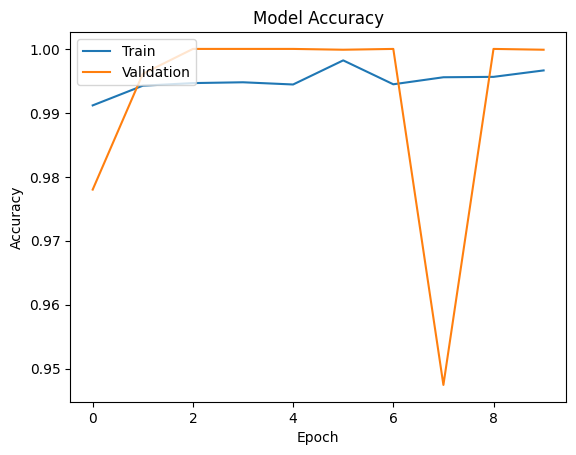

In [131]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

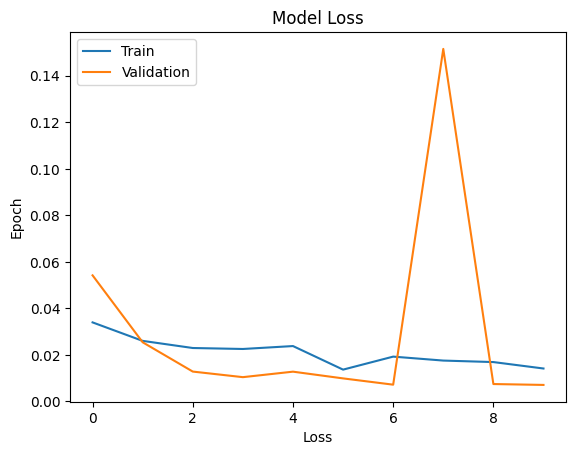

In [132]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [135]:
model.save('model_01.h5')

# Questionare

In [145]:
def count_score(questions):
  user_score = []
  for q in questions:
    print(q)
    user_input = int(input("Masukkan range dari 0-3: "))
    user_score.append(user_input)
  print(user_score)
  return user_score

In [146]:
def predict_level(score):
  x = np.expand_dims(pd.DataFrame(score), axis=0)
  prediction = model.predict(x)
  index = np.argmax(prediction)
  level = ' '
  if index == 0:
    level = 'Normal'
  elif index == 1:
    level = 'Mild'
  elif index == 2:
    level = 'Moderate'
  elif index == 3:
    level = 'Severe'
  elif index == 4:
    level = 'Extremely Severe'
  return level


Depression

In [147]:
q_depression = [
    "Sepertinya saya tidak merasakan perasaan positif sama sekali.",
    "Sepertinya saya tidak bisa maju atau berubah.",
    "Saya merasa tidak ada lagi yang bisa diharapkan.",
    "Saya merasa sedih dan depresi.",
    "Saya merasa kehilangan minat pada segala hal.",
    "Saya merasa Saya tidak berharga sebagai manusia.",
    "Saya merasa hidup ini tidak berguna.",
    "Sepertinya saya tidak mendapatkan kesenangan apapun dari apa yang saya.",
    "Saya merasa sedih.",
    "Saya tidak bisa merasa antusias terhadap apa pun.",
    "Saya merasa saya tidak berharga.",
    "Saya tidak melihat adanya harapan di masa depan.",
    "Saya merasa hidup ini tidak ada artinya.",
    "Saya merasa sulit untuk meningkatkan inisiatif dalam melakukan sesuatu."
]

In [148]:
s_depression = count_score(q_depression)
# Menyimpan jawaban ke file CSV
data.to_csv("jawabandepresi.csv", index=False)

Sepertinya saya tidak merasakan perasaan positif sama sekali.
Masukkan range dari 0-3: 1
Sepertinya saya tidak bisa maju atau berubah.
Masukkan range dari 0-3: 1
Saya merasa tidak ada lagi yang bisa diharapkan.
Masukkan range dari 0-3: 1
Saya merasa sedih dan depresi.
Masukkan range dari 0-3: 1
Saya merasa kehilangan minat pada segala hal.
Masukkan range dari 0-3: 1
Saya merasa Saya tidak berharga sebagai manusia.
Masukkan range dari 0-3: 1
Saya merasa hidup ini tidak berguna.
Masukkan range dari 0-3: 1
Sepertinya saya tidak mendapatkan kesenangan apapun dari apa yang saya.
Masukkan range dari 0-3: 1
Saya merasa sedih.
Masukkan range dari 0-3: 1
Saya tidak bisa merasa antusias terhadap apa pun.
Masukkan range dari 0-3: 1
Saya merasa saya tidak berharga.
Masukkan range dari 0-3: 1
Saya tidak melihat adanya harapan di masa depan.
Masukkan range dari 0-3: 1
Saya merasa hidup ini tidak ada artinya.
Masukkan range dari 0-3: 1
Saya merasa sulit untuk meningkatkan inisiatif dalam melakukan se

In [149]:
predict_level(s_depression)


1/1 [==============================] - 0s 33ms/step


'Normal'

Anxiety

In [150]:
q_anxiety = [
    "Saya merasa mulut saya kering.",
    "Saya mengalami kesulitan bernapas (misalnya napas terlalu cepat dan sesak napas tanpa adanya aktivitas fisik).",
    "Saya merasa gemetar (misalnya kaki terasa lemas).",
    "Saya menemukan diri saya dalam situasi yang membuat saya sangat cemas. Saya merasa sangat lega ketika itu berakhir.",
    "Saya merasa akan pingsan.",
    "Saya berkeringat banyak (misalnya tangan berkeringat) tanpa adanya suhu tinggi atau aktivitas fisik.",
    "Saya merasa takut tanpa alasan yang jelas.",
    "Saya kesulitan menelan.",
    "Saya menyadari tindakan jantung saya ketika tidak ada aktivitas fisik (misalnya rasa detak jantung meningkat).",
    "Saya merasa hampir panik.",
    "Saya takut kalau saya akan diberikan tanggung jawab beberapa tugas sepele tapi asing.",
    "Saya merasa takut.",
    "Saya khawatir dengan situasi dimana saya mungkin panik dan mempermalukan diri sendiri.",
    "Saya mengalami gemetar (misalnya di tangan)."
]

In [151]:
s_anxiety = count_score(q_anxiety)
# Menyimpan jawaban ke file CSV
data.to_csv("jawabaAnxiety.csv", index=False)

Saya merasa mulut saya kering.
Masukkan range dari 0-3: 1
Saya mengalami kesulitan bernapas (misalnya napas terlalu cepat dan sesak napas tanpa adanya aktivitas fisik).
Masukkan range dari 0-3: 1
Saya merasa gemetar (misalnya kaki terasa lemas).
Masukkan range dari 0-3: 1
Saya menemukan diri saya dalam situasi yang membuat saya sangat cemas. Saya merasa sangat lega ketika itu berakhir.
Masukkan range dari 0-3: 1
Saya merasa akan pingsan.
Masukkan range dari 0-3: 1
Saya berkeringat banyak (misalnya tangan berkeringat) tanpa adanya suhu tinggi atau aktivitas fisik.
Masukkan range dari 0-3: 1
Saya merasa takut tanpa alasan yang jelas.
Masukkan range dari 0-3: 1
Saya kesulitan menelan.
Masukkan range dari 0-3: 1
Saya menyadari tindakan jantung saya ketika tidak ada aktivitas fisik (misalnya rasa detak jantung meningkat).
Masukkan range dari 0-3: 1
Saya merasa hampir panik.
Masukkan range dari 0-3: 1
Saya takut kalau saya akan diberikan tanggung jawab beberapa tugas sepele tapi asing.
Masuk

In [152]:
predict_level(s_anxiety)

1/1 [==============================] - 0s 31ms/step


'Moderate'

Stress

In [153]:
q_stress = [
    "Saya merasa kesal karena hal-hal sepele.",
    "Saya cenderung bereaksi berlebihan terhadap situasi.",
    "Saya merasa sulit untuk rileks.",
    "Saya merasa mudah marah.",
    "Saya merasa Saya menggunakan banyak energi gugup.",
    "Saya menjadi tidak sabar ketika saya mengalami keterlambatan dalam hal apa pun (misalnya lift dan lampu lalu lintas yang terlalu lama).",
    "Saya merasa agak sensitif.",
    "Saya merasa sulit untuk bersantai.",
    "Saya merasa sangat mudah tersinggung.",
    "Saya merasa sulit untuk tenang setelah ada sesuatu yang membuat saya kesal.",
    "Saya merasa sulit menoleransi interupsi terhadap apa yang sedang saya lakukan.",
    "Saya berada dalam keadaan tegang.",
    "Saya tidak toleran terhadap apa pun yang menghalangi saya untuk melanjutkan pekerjaan saya.",
    "Saya merasa gelisah."
]

In [158]:
stress_score = count_score(q_stress)
print(stress_score)
# Menyimpan jawaban ke file CSV
data.to_csv("jawabastress.csv", index=False)

Saya merasa kesal karena hal-hal sepele.
Masukkan range dari 0-3: 2
Saya cenderung bereaksi berlebihan terhadap situasi.
Masukkan range dari 0-3: 1
Saya merasa sulit untuk rileks.
Masukkan range dari 0-3: 1
Saya merasa mudah marah.
Masukkan range dari 0-3: 2
Saya merasa Saya menggunakan banyak energi gugup.
Masukkan range dari 0-3: 1
Saya menjadi tidak sabar ketika saya mengalami keterlambatan dalam hal apa pun (misalnya lift dan lampu lalu lintas yang terlalu lama).
Masukkan range dari 0-3: 3
Saya merasa agak sensitif.
Masukkan range dari 0-3: 2
Saya merasa sulit untuk bersantai.
Masukkan range dari 0-3: 1
Saya merasa sangat mudah tersinggung.
Masukkan range dari 0-3: 2
Saya merasa sulit untuk tenang setelah ada sesuatu yang membuat saya kesal.
Masukkan range dari 0-3: 2
Saya merasa sulit menoleransi interupsi terhadap apa yang sedang saya lakukan.
Masukkan range dari 0-3: 3
Saya berada dalam keadaan tegang.
Masukkan range dari 0-3: 2
Saya tidak toleran terhadap apa pun yang menghalan

In [159]:
predict_level(stress_score)

1/1 [==============================] - 0s 22ms/step


'Moderate'

In [160]:
tf.saved_model.save(model,'/content/TFLite/')

In [161]:
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model('/content/TFLite')
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model_02.tflite')
tflite_model_file.write_bytes(tflite_model)

8480

--------